# Imports

In [2]:
#!pip install torchtext
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import torchtext
import torch
from torch import nn,optim
from time import time


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
data = pd.read_csv("dataframe.csv")
print(data)



      Unnamed: 0                                               text  encoded
0              0  The soil I’m walking over comes    from deeper...    False
1              1  the close air of the earth whence she derived ...     True
2              2  Lyric night of the lingering Indian Summer,\nS...    False
3              3  “Percussus sum sicut foenum, et aruit cor meum...    False
4              4  I should be happy with my lot: A wife and moth...    False
...          ...                                                ...      ...
4789        4789  office has never really is its oldest daughter...     True
4790        4790  soot from her car with suitcases and hugged he...     True
4791        4791  Seeing in crowded restaurants the one you love...    False
4792        4792  flower sweet as I can never forsake And Fortun...     True
4793        4793  Echo that loved hid within a wood Would to her...    False

[4794 rows x 3 columns]


Creating tokenizer and vocabulary

In [4]:
from torchtext.data import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.nn.utils import rnn
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)


tokenizer = get_tokenizer("basic_english")

def build_vocabulary(datasets):
    for dataset in datasets:
        #print(dataset)
        for text in dataset['text']:
            yield tokenizer(text)

vocab = build_vocab_from_iterator(build_vocabulary([data,data]), min_freq=3, specials=["<UNK>"])

vocab.set_default_index(vocab["<UNK>"])

for l in data['text']:
  tokens = tokenizer(l)
  indexes = vocab(tokens)


Creating Dataloader

In [5]:

class Text(Dataset):
  def __init__(self,df):
    self.df = df
    #print(df)

  def pad(self,seq):
    if len(seq)>140:
      return seq[:140]
    else:
      for i in range(140-len(seq)):
        seq.insert(0,0)
      return seq

  def __len__(self):
    return len(self.df['encoded'])
  def __getitem__(self,idx):
    
    return torch.tensor(self.pad(vocab(tokenizer(self.df['text'][idx])))) , int(self.df['encoded'][idx])

test_loader  = DataLoader(Text(test.reset_index()), batch_size=4)
train_loader = DataLoader(Text(train.reset_index()),batch_size=128)

for txt , tgt in test_loader:
  _
  #print(txt)
  #print(txt)
voc = len(vocab)
#print(tokens)

print(vocab(["<UNK>"]))

[0]


In [6]:
print(test)
print(train)

      Unnamed: 0                                               text  encoded
3657        3657  this Earth that is my Muse had slept. Give me ...     True
2883        2883  within his hand Against Mamá s swart devils we...     True
1494        1494  So masterfully rude Wasting of ancient than pl...     True
2410        2410  and nibble the lettuce has grown deep like the...     True
4583        4583  Surfaces serve their own purposes, strive to r...    False
...          ...                                                ...      ...
3825        3825  We have walked in Love's land a little way, We...    False
740          740  his home my father did. Ask us not. I don t kn...     True
1731        1731  is where those frozen. On a crosshatch of my s...     True
1026        1026  With only his dim lantern    To tell him where...    False
246          246  When in the chronicle of wasted time I see des...    False

[959 rows x 3 columns]
      Unnamed: 0                                    

## Utils


In [7]:
def bitwise_input(input,n_max = 16):  
    bits = []
    for i in bin(input)[2:]:
        bits.append(int(i))
    # filling
    for _ in range(n_max - len(bits)):
        bits.insert(0,0)
    return bits[:n_max]

print(bitwise_input(1,2))

[0, 1]


In [8]:
def getProb(prob,nmax = 16):
    out = []
    for i in range(nmax):
        out.append(prob[2**nmax-1])
    print(out)
    return out
        
    
    

# Quantum Layer

In [74]:
import pennylane as qml
n_qubits = 8
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    #inp = bitwise_input(inputs,n_qubits)
    #print(inputs)
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires = i)) for i in range(n_qubits)]


In [85]:
print(qml.draw(qnode)([0.1691,  0.3316,  0.1907, -0.0786, -0.4375,  0.3461,  0.0699,  0.0761],[[3.4530, 2.4971, 2.5214, 5.7016, 0.0130, 2.4136, 0.0124, 3.0411],
        [3.7877, 2.4384, 3.2014, 0.4228, 1.5739, 5.9255, 4.4249, 2.4230],
        [2.0272, 0.7587, 1.0911, 4.8632, 6.0885, 3.3768, 2.0957, 2.4795]]))
print(qml.draw(qnode)([-0.0706,  0.1354,  0.1490,  0.3922,  0.3268, -0.2659, -0.4065,  0.1324],[[6.0033, 0.7637, 1.3603, 1.8632, 0.1363, 0.2251, 4.0244, 3.5953],
        [3.2028, 0.8011, 2.7205, 4.6402, 0.6621, 5.7302, 1.4814, 4.3423],
        [3.7551, 2.0439, 2.8990, 1.4801, 6.2556, 3.6263, 6.1457, 3.5347]]))

0: ─╭AngleEmbedding(M0)─╭BasicEntanglerLayers(M1)─┤  <Z>
1: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
2: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
3: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
4: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
5: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
6: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
7: ─╰AngleEmbedding(M0)─╰BasicEntanglerLayers(M1)─┤  <Z>

M0 = 
[ 0.1691  0.3316  0.1907 -0.0786 -0.4375  0.3461  0.0699  0.0761]
M1 = 
[[3.453  2.4971 2.5214 5.7016 0.013  2.4136 0.0124 3.0411]
 [3.7877 2.4384 3.2014 0.4228 1.5739 5.9255 4.4249 2.423 ]
 [2.0272 0.7587 1.0911 4.8632 6.0885 3.3768 2.0957 2.4795]]
0: ─╭AngleEmbedding(M0)─╭BasicEntanglerLayers(M1)─┤  <Z>
1: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
2: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
3: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
4: ─├AngleEmbedding(M0)─├BasicEntanglerLayers(M1)─┤  <Z>
5:

In [75]:
n_layers = 3
weight_shapes = {"weights": (n_layers, n_qubits)}

In [78]:
class HybridModel(torch.nn.Module):
    
    
    def __init__(self , embeddingSize):
        super().__init__()
        self.memory = {}
        self.inpFormat = torch.nn.Linear(n_qubits*2, n_qubits*2)
        self.qlayer_1 = qml.qnn.TorchLayer(qnode, weight_shapes)
        self.qlayer_2 = qml.qnn.TorchLayer(qnode, weight_shapes)
        self.clayer = torch.nn.Linear(2*n_qubits, embeddingSize)



    def __EmbeddingBag__(self,X):
        
        if str(X) in self.memory:
            # Check if index is Cached
            return self.memory[str(X)]
        #Formatting Index into Binary
        x = torch.tensor(bitwise_input(int(X) , n_qubits*2))
        #Convert Binary output into float
        x = self.inpFormat(x.float())
        #Split Layer into 2 seperate Quantum Circuits
        x_1 = self.qlayer_1(x[:n_qubits-1])
        x_2 = self.qlayer_2(x[n_qubits:])
        
        #Concatnate and Resize output
        x = torch.cat([x_1, x_2], axis=-1)
        x = self.clayer(x.float())
        
        #Cache Value
        self.memory[str(X)] = x
        return x
    
    def __RecursiveBag__(self,x):
        #print(x.dim())
        if x.dim()==0: return self.__EmbeddingBag__(x)
        
        Bag = []
        for subtensor in x:
            Bag.append(self.__RecursiveBag__(subtensor))
        #print(Bag)
        return torch.stack(Bag)
    
    def forward(self, x):
        if  x.dim()==0: return self.__EmbeddingBag__(x)
        return self.__RecursiveBag__(x)

qmodel = HybridModel(64)


In [79]:
print(qmodel)
print(qmodel(torch.tensor([13])))

HybridModel(
  (inpFormat): Linear(in_features=16, out_features=16, bias=True)
  (qlayer_1): <Quantum Torch Layer: func=qnode>
  (qlayer_2): <Quantum Torch Layer: func=qnode>
  (clayer): Linear(in_features=16, out_features=64, bias=True)
)
tensor([-0.0706,  0.1354,  0.1490,  0.3922,  0.3268, -0.2659, -0.4065,  0.1324,
         0.1691,  0.3316,  0.1907, -0.0786, -0.4375,  0.3461,  0.0699,  0.0761],
       grad_fn=<ViewBackward0>)


tensor([[ 0.0138, -0.0513, -0.1983, -0.0785,  0.1334, -0.0053, -0.1481, -0.1005,
         -0.2271, -0.1507,  0.1297, -0.0027, -0.2455,  0.2287,  0.1284,  0.1905,
          0.1963, -0.2071, -0.0652, -0.0347,  0.2451, -0.0676,  0.1241, -0.2435,
         -0.0855, -0.1149,  0.0262,  0.0659,  0.1848, -0.1843, -0.1730,  0.1916,
          0.0383, -0.2340, -0.1323, -0.0296, -0.1259,  0.0620,  0.1016, -0.1007,
         -0.0172, -0.1773, -0.1013, -0.2012,  0.2671, -0.1175,  0.0943, -0.0631,
         -0.0810,  0.1571,  0.0251, -0.0820,  0.0094, -0.0637,  0.0139, -0.2580,
         -0.0346,  0.2324,  0.0957, -0.2013, -0.1148, -0.2067,  0.0971,  0.1013]],
       grad_fn=<StackBackward0>)


# Testing Hybrid Model for Consistency

In [80]:
from random import randint
import seaborn as sb

tensor([ 0.0384,  0.1800,  0.0995, -0.8978], grad_fn=<ViewBackward0>)
tensor([ 0.0340, -0.0398,  0.3288, -0.7351], grad_fn=<ViewBackward0>)


tensor([ 0.0340, -0.0398,  0.3288, -0.7351], grad_fn=<ViewBackward0>)
tensor([ 0.1575, -0.2312,  0.0074, -0.5606], grad_fn=<ViewBackward0>)
tensor([-0.2351, -0.2844,  0.0578, -1.1306], grad_fn=<ViewBackward0>)
tensor([-0.1115, -0.4758, -0.2636, -0.9561], grad_fn=<ViewBackward0>)
tensor([-0.1115, -0.4758, -0.2636, -0.9561], grad_fn=<ViewBackward0>)
tensor([ 0.3075,  0.4245,  0.3704, -0.5023], grad_fn=<ViewBackward0>)
tensor([ 0.4311,  0.2331,  0.0490, -0.3278], grad_fn=<ViewBackward0>)
tensor([ 0.4311,  0.2331,  0.0490, -0.3278], grad_fn=<ViewBackward0>)
tensor([ 0.4311,  0.2331,  0.0490, -0.3278], grad_fn=<ViewBackward0>)


<Axes: >

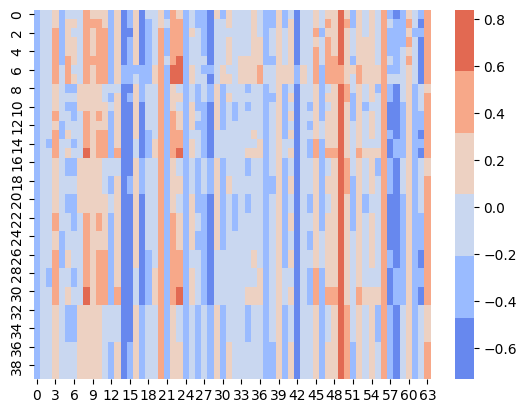

In [ ]:
testrange = 32
out = []
inp = -1
for i in range(testrange):
    inp +=1
    #print(inp)
    X = torch.tensor([inp])
    out.append(qmodel(X).detach().numpy().reshape([64]).tolist())

sb.heatmap(out,cmap= sb.color_palette("coolwarm"))


In [83]:
for i in qmodel.named_parameters():
    print(i)

('inpFormat.weight', Parameter containing:
tensor([[-0.0796,  0.1649,  0.2464,  0.1117, -0.1030,  0.2238, -0.0297, -0.2086,
          0.0708,  0.1248,  0.1470,  0.0860, -0.0316, -0.0054, -0.2467,  0.1562],
        [ 0.1871,  0.1745,  0.1956,  0.2062,  0.2134,  0.1249, -0.0525,  0.0204,
          0.1768,  0.1404,  0.0305, -0.1402, -0.1032,  0.0530, -0.2210, -0.0010],
        [-0.1243, -0.1003, -0.2470,  0.2087,  0.0193,  0.0235, -0.0659,  0.1621,
          0.1156,  0.2183,  0.1683,  0.1556,  0.0773,  0.1220, -0.2098,  0.0469],
        [-0.0589, -0.0453, -0.1771,  0.1576, -0.2455,  0.1653,  0.0861,  0.2254,
         -0.0566,  0.1496,  0.0623,  0.1109,  0.1309, -0.1684,  0.0008,  0.2255],
        [-0.0984, -0.2346,  0.1093,  0.1557, -0.0201,  0.1956, -0.2016, -0.1573,
         -0.0633, -0.1203,  0.2187,  0.0542,  0.0052,  0.1139,  0.1121,  0.1542],
        [-0.1899, -0.0812,  0.2463,  0.0955, -0.1028, -0.1507, -0.2079, -0.1810,
         -0.0728,  0.1807,  0.0780, -0.2342,  0.0323,  0.0987

# Declaring Hybrid Model

In [87]:

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.embedding_layer = HybridModel(64)
        self.rnn = nn.RNN(64,32, 3, batch_first=True)
        self.linear1 = nn.Linear(32,32)
        self.linear2 = nn.Linear(32,2)
        self.act = nn.ReLU()
        self.out = nn.LogSoftmax(dim = 1)

    def forward(self, X_batch):
        embeddings = self.embedding_layer(X_batch)
        output, hidden = self.rnn(embeddings)
        return self.out(self.linear2(self.act(self.linear1(self.act(output[:,-1])))))

model = RNN()

print(model)


RNN(
  (embedding_layer): HybridModel(
    (inpFormat): Linear(in_features=16, out_features=16, bias=True)
    (qlayer_1): <Quantum Torch Layer: func=qnode>
    (qlayer_2): <Quantum Torch Layer: func=qnode>
    (clayer): Linear(in_features=16, out_features=64, bias=True)
  )
  (rnn): RNN(64, 32, num_layers=3, batch_first=True)
  (linear1): Linear(in_features=32, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=2, bias=True)
  (act): ReLU()
  (out): LogSoftmax(dim=1)
)


In [88]:
from word2ket import EmbeddingKet, EmbeddingKetXS , ketify,summary
summary(model)

Module Name                                                                           Total Parameters  Trainable Parameters # Elements in Trainable Parametrs       
Linear(in_features=16, out_features=16, bias=True)                                    2                 2                    272                                     
<Quantum Torch Layer: func=qnode>                                                     1                 1                    24                                      
<Quantum Torch Layer: func=qnode>                                                     1                 1                    24                                      
Linear(in_features=16, out_features=64, bias=True)                                    2                 2                    1,088                                   
RNN(64, 32, num_layers=3, batch_first=True)                                           12                12                   7,360                                   
Line

9890

In [57]:
accuracy = []
optimizer = optim.SGD(model.parameters(), lr=0.017, momentum=0.9)
criterion = nn.NLLLoss()
time0 = time()

Training

In [58]:
import tqdm

In [59]:
epochs = 20
for e in range(epochs):
    running_loss = 0
    with tqdm.tqdm(train_loader , unit = "batch") as tepoch:
      for text, tgt in tepoch:
        tepoch.set_description(f"Epoch {e}")
        # Training pass
        optimizer.zero_grad()

        output = model(text)

        loss = criterion(output, tgt)

        #This is where the model learns by backpropagating
        loss.backward(retain_graph=True)
        #And optimizes its weights here
        optimizer.step()
        tepoch.set_postfix(loss=loss.item())
        #print(loss.item())
        running_loss += loss.item()

      else:
        #print("\nTraining Time (in minutes) =",(time()-time0)/60)
        #print(output)
        
        print("\nEpoch {} - Training loss: {}".format(e+1, running_loss/len(test_loader)))
      
        
    correct_count, all_count = 0, 0
    for images,labels in test_loader:
      for i in range(len(labels)):
        img = images[i].view(1,-1)
        with torch.no_grad():
          logps = model(img)


        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        #print(pred_label)
        if(true_label == pred_label):
          correct_count += 1
        all_count += 1

  #print("Number Of Images Tested =", all_count)
    print("Model Accuracy =", (correct_count/all_count))


  0%|          | 0/30 [00:00<?, ?batch/s]

Epoch 0:   0%|          | 0/30 [00:00<?, ?batch/s]

tensor([ 0.1615,  0.4377,  0.5535, -0.0857], grad_fn=<ViewBackward0>)
tensor([-0.0897,  0.6644,  0.9289, -0.0023], grad_fn=<ViewBackward0>)
tensor([-0.5451,  0.5548,  0.5220,  0.1098], grad_fn=<ViewBackward0>)
tensor([-0.1753,  0.7521,  0.3698,  0.3726], grad_fn=<ViewBackward0>)
tensor([-0.4102,  0.3830,  1.1947, -0.3095], grad_fn=<ViewBackward0>)
tensor([-0.6143,  0.0468,  0.4126, -0.2808], grad_fn=<ViewBackward0>)
tensor([-0.4957,  0.4707,  0.6357,  0.0654], grad_fn=<ViewBackward0>)
tensor([-0.2939,  0.3281,  0.1467,  0.0264], grad_fn=<ViewBackward0>)
tensor([-0.5288, -0.0409,  0.9716, -0.6557], grad_fn=<ViewBackward0>)
tensor([-0.2084,  0.2404,  0.7058, -0.3484], grad_fn=<ViewBackward0>)
tensor([-0.4102,  0.3830,  1.1947, -0.3095], grad_fn=<ViewBackward0>)
tensor([-0.8656,  0.2735,  0.7879, -0.1974], grad_fn=<ViewBackward0>)
tensor([-0.1753,  0.7521,  0.3698,  0.3726], grad_fn=<ViewBackward0>)
tensor([-0.1589,  0.1563,  0.8194, -0.3929], grad_fn=<ViewBackward0>)
tensor([-0.4102,  0.

Epoch 0:   0%|          | 0/30 [00:08<?, ?batch/s]

tensor([-0.4957,  0.4707,  0.6357,  0.0654], grad_fn=<ViewBackward0>)


KeyboardInterrupt: 

#Texts for testing:

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

Even my brother is not like to speak with me. They treat me like aids patent.

